In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import seaborn as sns
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [2]:
def readResult_ms(path, name):
    file = open(path)
    lines = file.readlines()
    data = []
    aux = []
    for line in lines:
        if line == '\n':
            data.append(aux)
            aux = []
        if line != '\n':
            aux.append(line)
    data.append(aux)
    tempo = float(data[0][-1].replace('\n', '')[6:])
    index = data[0][1].replace('\n', '').split(',')
    del data[0][0:2]
    del data[0][-1]
    data = data[0]
    data = [list(map(float, it.replace('\n', '').split(","))) for it in data]
    df = pd.DataFrame(data,columns=index)
    
    mse = sum(((df['y_i_analitico'] - df['erro'])**2))/20
    mae = sum(abs(df['y_i_analitico'] - df['erro']))/20
    mean_v = df['erro'].mean()
    
    file_log = open("log_me.txt", "a")
    file_log.write("\n\n" + name + ":\n")
    file_log.write("mse : " + str(mse) + "\n")
    file_log.write("mae : " + str(mae) + "\n")
    file_log.write("mean : " + str(mean_v))
    file_log.close()

    df.columns = ["x", "PVI", "ANALITICO", "ERRO"]
    dfm = df[["x", "PVI", "ANALITICO"]].melt('x', var_name='cols', value_name='vals')
    ax = sns.lineplot(data=dfm, x="x", y="vals", hue="cols", style="cols", markers=True)
    ax.set_xticks(range(0,101,5))
    ax.set_yticks(range(25,51,5))
    ax.set_ylabel("y")
    legend = ax.legend()
    fig = ax.get_figure()
    fig.set_size_inches(7,5)
    fig.savefig(name + ".svg")

In [3]:
def readResult_mc(path, name):
    file = open(path)
    lines = file.readlines()
    data = []
    aux = []
    for line in lines:
        if line == '\n':
            data.append(aux)
            aux = []
        if line != '\n':
            aux.append(line)
    data.append(aux)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=2)
    i = 0
    axsValues = [ax1[0], ax1[1], ax2[0], ax2[1]]
    method = ["(a) EULER", "(b) RK2", "(c) RK3", "(d) RK4"]

    file_log = open("log_me.txt", "a")
    file_log.write("\n\n" + name + ":")
    
    del data[-1]

    for dt in data:
        tempo = float(dt[-1].replace('\n', '')[6:])
        index = dt[1].replace('\n', '').split(',')
        del dt[0:2]
        del dt[-1]
        dt = [list(map(float, it.replace('\n', '').split(","))) for it in dt]
        df = pd.DataFrame(dt,columns=index)

        mse = sum(((df['y_i_analitico'] - df['erro'])**2))/20
        mae = sum(abs(df['y_i_analitico'] - df['erro']))/20
        mean_v = df['erro'].mean()
        
        file_log.write("\nmse : " + str(mse) + "\n")
        file_log.write("mae : " + str(mae) + "\n")
        file_log.write("mean : " + str(mean_v))

        df.columns = ["x", "PVI", "ANALITICO", "ERRO"]

        dfm = df[["x", "PVI", "ANALITICO"]].melt('x', var_name='cols', value_name='vals')
        sns.lineplot(data=dfm, x="x", y="vals", hue="cols", style="cols", markers=True, ax=axsValues[i])
        axsValues[i].set_xticks(range(0,101,10))
        axsValues[i].set_yticks(range(25,51,5))
        axsValues[i].set_ylabel("y")
        axsValues[i].set_xlabel("x\n"+method[i])
        legend = axsValues[i].legend()
        i = i + 1

    file_log.close()
    fig.set_size_inches(7, 5)
    fig.tight_layout()
    fig.savefig(name + ".svg")

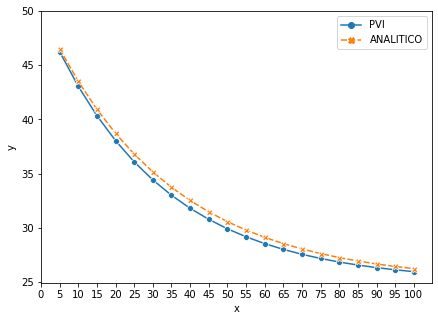

In [12]:
readResult_ms("log_euler.txt", "euler")

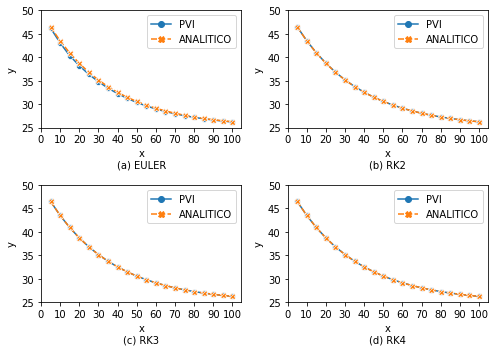

In [32]:
readResult_mc("log_adams_bashforth_passo_2.txt", "a_b_2")

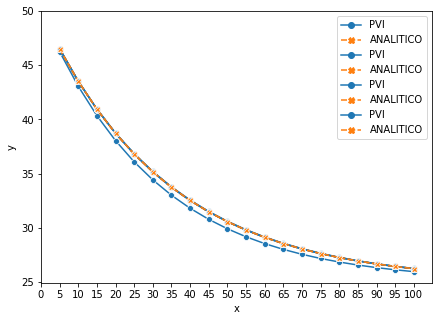

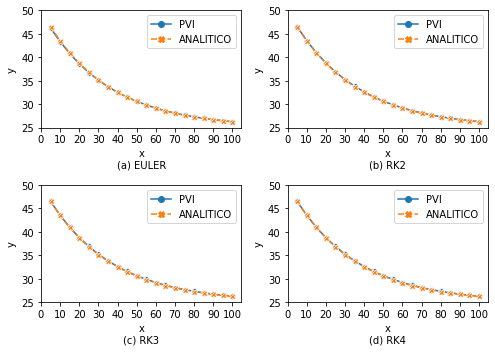

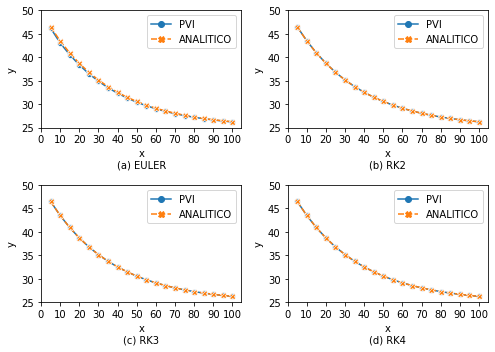

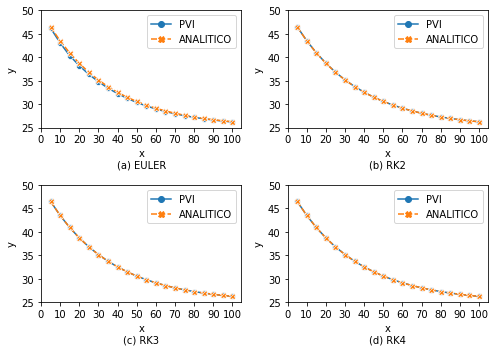

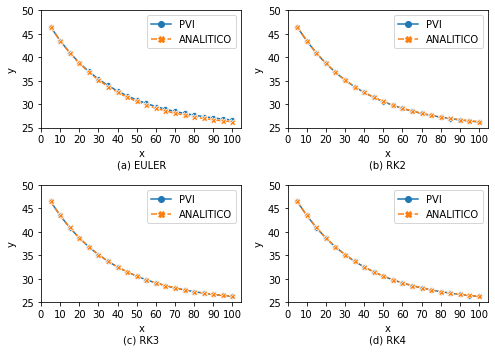

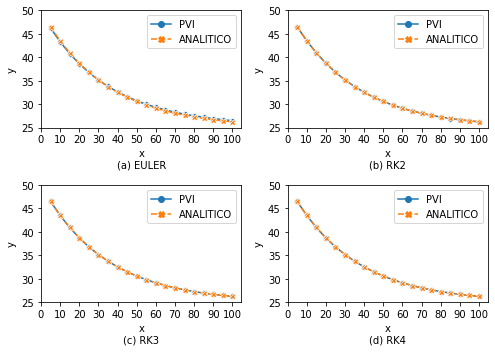

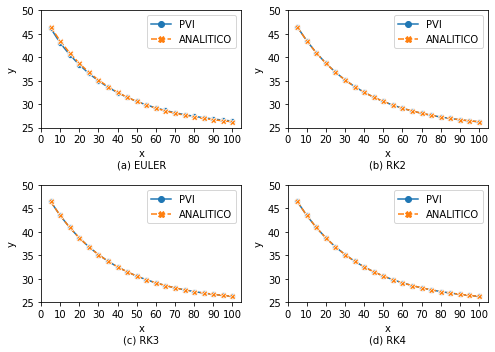

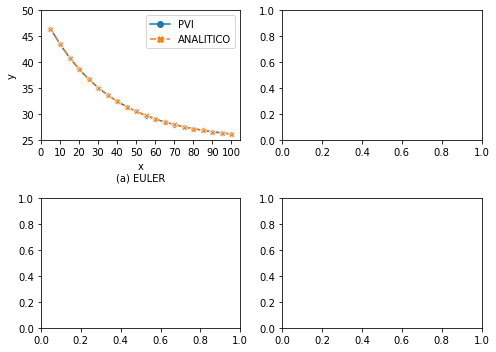

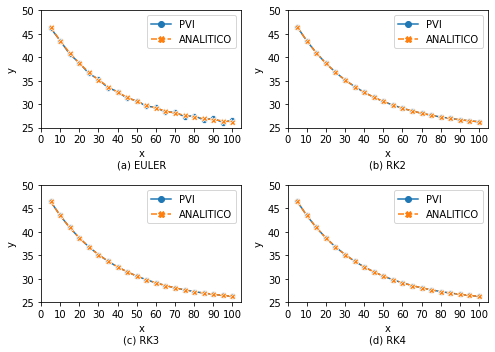

In [34]:
readResult_ms("log_euler.txt", "euler")
readResult_ms("log_rk2.txt", "rk2")
readResult_ms("log_rk3.txt", "rk3")
readResult_ms("log_rk4.txt", "rk4")
readResult_mc("log_adams_bashforth_passo_2.txt", "a_b_2")
readResult_mc("log_adams_bashforth_passo_3.txt", "a_b_3")
readResult_mc("log_adams_bashforth_passo_4.txt", "a_b_4")
readResult_mc("log_adams_moulton_passo_2.txt", "a_m_2")
readResult_mc("log_adams_moulton_passo_3.txt", "a_m_3")
readResult_mc("log_adams_moulton_passo_4.txt", "a_m_4")
readResult_ms("log_preditor_corretor.txt", "p_c")
readResult_mc("log_preditor_corretor_implicito.txt", "p_c_i")